# Machine Learning Module

## Implementing convolutional neural network for object recognition(CIFAR 10 dataset)

In [143]:
#Import the necessary libraries
from tensorflow.keras import Sequential, datasets 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.utils import to_categorical

In [168]:
#Load the cifar10 dataset and assign it as a tuple as follows  
(X_train_all, y_train_all),(X_test,y_test)=datasets.cifar10.load_data()

In [169]:
#Dimensions of the X_train array(number of images,length of the image,width of the image,number of channels-rgb channel)
X_train_all.shape

(50000, 32, 32, 3)

In [171]:
#Dimenisons of the X_test array
X_test.shape

(10000, 32, 32, 3)

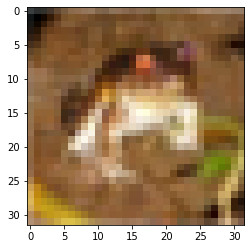

In [172]:
#Use matplotlib to view the image 
plt.imshow(X_train_all[0])

In [173]:
y_train_all

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [174]:
y_train_all.shape

(50000, 1)

In [175]:
#We have a 2 dimension numpy array
y_train_all[0][0]

6

In [176]:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [177]:
#Using the lable names to get the actual names of classes
LABEL_NAMES[y_train_all[0][0]]

'frog'

In [178]:
#The shape of the image
#32, 32 is the width and the height
#3 is the number of channels (These are the number of colors): Red, Green & Blue (RGB)
X_train_all.shape 

(50000, 32, 32, 3)

In [179]:
#For the X_train data sample:
number_of_images, width, height, number_of_channels=X_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {width} \t| height = {height} \t| channels = {number_of_channels}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [180]:
X_test.shape

(10000, 32, 32, 3)

In [181]:
#Normalise the data so that to make our machine learning model, be able to learn easier from the data
#Each pixel value of the photo(for every channel) takes a value within the range of 0-255 so we divide each pixel vbalue with 255 and transform the range between 0-1
X_train_all =X_train_all / 255.0
X_test = X_test / 255.0

In [182]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [183]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [193]:
#Creating the categorical encoding for the 'y_train' and 'y_test' data
y_categorical_train_all = to_categorical(y_train_all,10)
y_categorical_test = to_categorical(y_test,10)

In [194]:
y_categorical_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [195]:
y_categorical_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [152]:
#Creating the validation dataset
#Utilisng a validation dataset we ensure that only the our best version of our model reaches our testing dataset

In [196]:
VALIDATION_SIZE = 10000

In [197]:
x_validation=X_train_all[:VALIDATION_SIZE]
y_validation_categorical = y_categorical_train_all[:VALIDATION_SIZE]

In [198]:
x_validation.shape

(10000, 32, 32, 3)

In [199]:
y_validation_categorical.shape

(10000, 10)

In [200]:
x_validation

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [201]:
y_validation_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [202]:
#The last 40000 values will consist the training dataset
X_train = X_train_all[VALIDATION_SIZE:]
y_categorical_train= y_categorical_train_all[VALIDATION_SIZE:]

In [203]:
X_train.shape

(40000, 32, 32, 3)

In [206]:
y_categorical_train.shape

(40000, 10)

In [207]:
#BUILD THE MODEL

In [208]:
#Develop the model
model=Sequential()

# FIRST SET OF LAYERS
# Add a convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
          
#SECOND SET OF LAYERS 
#Add another convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
# Add another pulling layer
model.add(MaxPooling2D(pool_size=(2,2)))
          

#Flatten our output for the subsequent dense layers(final layers)
model.add(Flatten())

#256 neurons in dense hidden layer-this number is changable depending on the complexity
model.add(Dense(units=256,activation='relu'))
#Last dense layer is the classifier, thus we select 10 neurons(10 possible classes)
model.add(Dense(units=10,activation='softmax'))

In [209]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [211]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [212]:
#Adding early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [218]:
#Early stopping is a technique which stops model training when parameter updates remain the same on a validation test 
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [217]:
history = model.fit(X_train,y_categorical_train,epochs=25,validation_data=(x_validation,y_validation_categorical),callbacks=[early_stop])

Epoch 1/25
1250/1250 [==============================] - 50s 39ms/step - loss: 1.5511 - accuracy: 0.4401 - val_loss: 1.2942 - val_accuracy: 0.5356
Epoch 2/25
1250/1250 [==============================] - 48s 39ms/step - loss: 1.2275 - accuracy: 0.5626 - val_loss: 1.1487 - val_accuracy: 0.5917
Epoch 3/25
1250/1250 [==============================] - 54s 43ms/step - loss: 1.0839 - accuracy: 0.6196 - val_loss: 1.0711 - val_accuracy: 0.6197
Epoch 4/25
1250/1250 [==============================] - 55s 44ms/step - loss: 0.9679 - accuracy: 0.6599 - val_loss: 1.0111 - val_accuracy: 0.6505
Epoch 5/25
1250/1250 [==============================] - 54s 44ms/step - loss: 0.8756 - accuracy: 0.6951 - val_loss: 0.9722 - val_accuracy: 0.6659
Epoch 6/25
1250/1250 [==============================] - 62s 49ms/step - loss: 0.7929 - accuracy: 0.7228 - val_loss: 0.9814 - val_accuracy: 0.6594
Epoch 7/25
1250/1250 [==============================] - 60s 48ms/step - loss: 0.7163 - accuracy: 0.7491 - val_loss: 1.0322 -

In [219]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [223]:
#Include the relevant metrics into a dataframe
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [224]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.551054,0.440075,1.294208,0.5356
1,1.227470,0.562550,1.148655,0.5917
2,1.083878,0.619600,1.071079,0.6197
3,0.967880,0.659850,1.011052,0.6505
4,0.875589,0.695100,0.972201,0.6659
5,0.792850,0.722775,0.981445,0.6594
6,0.716268,0.749125,1.032159,0.6588


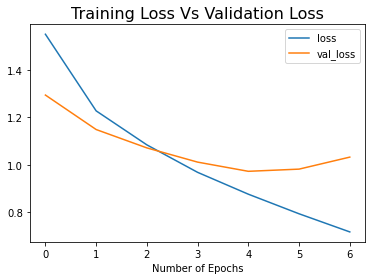

In [227]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.xlabel('Number of Epochs')
plt.show()

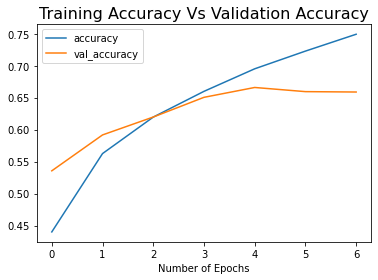

In [228]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.xlabel('Number of Epochs')
plt.show()

In [229]:
#Evaluate the model for testing data
model.evaluate(X_test,y_categorical_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0384 - accuracy: 0.6479


[1.0384410619735718, 0.6478999853134155]

In [230]:
#Classification Report and Confusion matrix

In [231]:
from sklearn.metrics import classification_report, confusion_matrix

In [234]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [235]:
predictions

array([[2.14551147e-02, 1.04081619e-03, 6.26917481e-02, ...,
        1.02446543e-03, 2.99954526e-02, 3.61176426e-05],
       [1.51226655e-01, 2.28984267e-01, 8.11720895e-08, ...,
        6.18736067e-08, 5.64496994e-01, 5.52845784e-02],
       [3.95336486e-02, 3.31833303e-01, 1.85838027e-03, ...,
        1.34381131e-04, 6.10948920e-01, 1.39947254e-02],
       ...,
       [1.02267895e-05, 1.31167369e-07, 3.97579744e-02, ...,
        2.62154583e-02, 4.74616172e-06, 1.58402543e-07],
       [5.55975974e-01, 1.15443565e-01, 1.72174361e-03, ...,
        1.70346582e-03, 4.45578713e-03, 3.56910256e-04],
       [7.66455798e-07, 4.29643535e-07, 1.30622720e-04, ...,
        9.81209099e-01, 7.84658383e-08, 3.69861255e-07]], dtype=float32)

In [236]:
predictions.shape

(10000, 10)

In [253]:
index_prediction = np.argmax(predictions,axis=-1)

In [254]:
index_prediction

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [255]:
index_prediction.shape

(10000,)

In [256]:
print(classification_report(y_test,index_prediction))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1000
           1       0.66      0.86      0.75      1000
           2       0.55      0.55      0.55      1000
           3       0.46      0.56      0.50      1000
           4       0.59      0.62      0.60      1000
           5       0.62      0.47      0.53      1000
           6       0.76      0.68      0.72      1000
           7       0.79      0.65      0.71      1000
           8       0.69      0.80      0.74      1000
           9       0.87      0.54      0.67      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [267]:
confusion_matrix(y_test,index_prediction)

array([[750,  39,  43,  14,  16,   4,   7,   7, 105,  15],
       [ 27, 859,   7,  14,   4,   2,   5,   3,  53,  26],
       [102,  18, 550,  80, 100,  50,  51,  21,  26,   2],
       [ 36,  25,  77, 562,  77, 106,  47,  21,  36,  13],
       [ 43,  10,  85,  77, 622,  27,  63,  51,  21,   1],
       [ 25,  12,  89, 255,  66, 465,  19,  50,  14,   5],
       [ 17,  22,  70,  98,  55,  21, 682,   5,  28,   2],
       [ 30,  17,  43,  75,  95,  57,  11, 649,   9,  14],
       [ 95,  54,   7,  15,  13,   8,   5,   1, 797,   5],
       [ 52, 244,  22,  36,  12,  10,   7,  14,  60, 543]], dtype=int64)

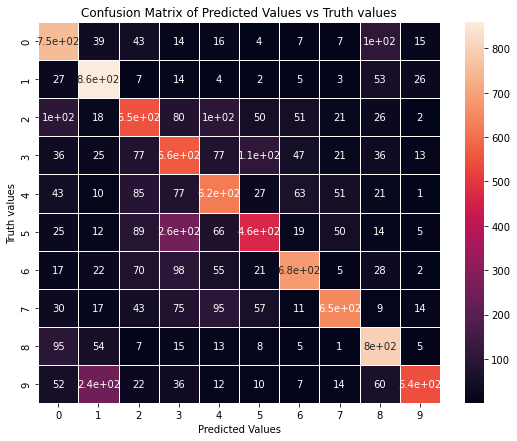

In [270]:
import seaborn as sns
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,index_prediction),annot=True,linewidths=1,linecolor='white')
plt.ylabel('Truth values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix of Predicted Values vs Truth values')
plt.show()

In [ ]:
#Prediction of a single image

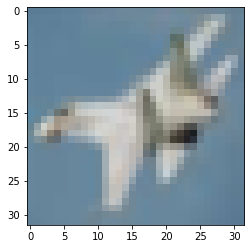

In [281]:
plt.imshow(X_test[10])

In [282]:
LABEL_NAMES[y_test[10][0]]

'airplane'

In [275]:
#The tenth image within the testing dataset is correctly labelled as an airplane

6

In [289]:
#Function for image display along with the category refference
def showImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(LABEL_NAMES[y[index][0]])

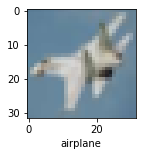

In [290]:
showImage(X_test,y_test,10)

In [ ]:
#https://www.youtube.com/watch?v=XiUlqN1Ay0U